In [1]:
import scipy.ndimage as nd
from scipy.misc import imread 

import numpy as np
from numpy.linalg import inv,lstsq
from pylab import *
%pylab 


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['power', 'info', 'linalg', 'random', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [52]:
def cal_acel(imname,dx,f ):
    imagen=imread(imname) #leer la imagen
    imfloat=np.asarray(imagen,dtype=np.float32) #overtir a punto flotante 
    imgrey=(imfloat[:,:,0]+imfloat[:,:,1]+imfloat[:,:,2])/3 #escala de grices 
    imfil=nd.median_filter(imgrey,(3,3)) #filtrar imagen 
    imbin=where(imfil<50,0,255) #binarizar
    imnum,n=nd.label(imbin) #etiquetar las bolas 
    px=nd.measurements.center_of_mass(imgrey,imnum, [3,4,5,6,7,8]) #encontrar los centros de masa
    
    
    v0=9810*pow(2*0.2*px[0][0]/9810,0.5) #velocidad inicial y posicion inicial 
    x0=px[0][0]*dx
    
    y=[]
    b=len(px)
    for i in range(b):
        y.append((px[i][0]*dx))
    
    t=[]
    for i in range(len(y)):
        t.append(i*(1/f))

    t2=[]
    for j in range(len(t)):
        t2.append(t[j]*t[j])


    #print(len(y),len(t2))
    #print(y)
    #minimos cuadrados


    x=np.array(t2)
    y=np.array(y)

    #x=np.linspace(0,15,10)
    #y=10+4.566*x+5.67*x**2+0*np.random.random(x.shape)


    f=[]
    f.append(lambda x:np.ones_like(x))
    f.append(lambda x:x)
    f.append(lambda x:x**2)

    Xt=[]

    for fu in f:
        Xt.append(fu(x))

    Xt= np.array(Xt)
    X=Xt.transpose()



    a = np.dot(np.dot(inv(np.dot(Xt,X)),Xt),y)

    #print( a)

    #print(lstsq(X,y)[0])
    #print(X)

    plot(y,x)

    y1=0
    for n,ac in enumerate(a):
        #print n, ac,x
        y1=y1+ac*x**n
        #print y1
    plot(y1,x)
    plt.ylabel("t2")
    plt.xlabel("y(altura)")

    show()
 
    
    return (a , y, t2)

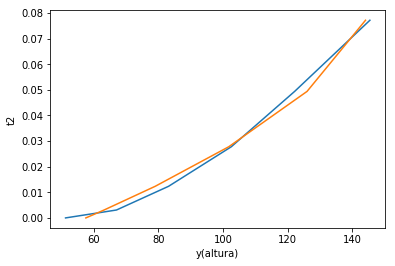

(array([   57.54008682,  1856.16361289, -9522.34165257]),
 array([ 51.25748756,  67.01758967,  83.14143227, 102.54143227,
        122.1388788 , 145.42840448]),
 [0.0,
  0.0030864197530864196,
  0.012345679012345678,
  0.027777777777777776,
  0.04938271604938271,
  0.0771604938271605])

In [56]:

cal_acel("Bolas2.tif",0.2,18 )